In [1]:
import pandas as pd
import matplotlib.pyplot as plt   
import plotly.express as px
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
import geopandas
import folium
from folium import plugins
import altair as alt
import warnings
warnings.filterwarnings('ignore')

In [2]:
order_df = pd.read_excel('Sample - Superstore.xlsx')
us_orders = order_df[order_df['Country']== 'United States']
us_orders.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 22 columns]

In [3]:
us_orders.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
map                     float64
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [4]:
#Converting dates to Quarter and year
us_orders['Quarter']= us_orders['Order Date'].dt.to_period('Q')
us_orders['Quarter']

0       2016Q4
1       2016Q4
2       2016Q2
3       2015Q4
4       2015Q4
         ...  
9989    2014Q1
9990    2017Q1
9991    2017Q1
9992    2017Q1
9993    2017Q2
Name: Quarter, Length: 9994, dtype: period[Q-DEC]

In [5]:
us_orders['Year'] = us_orders['Order Date'].dt.year

In [6]:
us_orders= us_orders.drop(columns=['map'])
us_orders.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Quarter          0
Year             0
dtype: int64

In [7]:
# Group data according to quarter and category
category_grp = us_orders.groupby(['Quarter', 'Category'])[['Sales']].sum()
category_grp.head(1)

Sales
Quarter Category            
2014Q1  Furniture  22656.139

In [8]:
quant_grp = us_orders.groupby(['Quarter', 'Category'])[['Quantity']].sum()
quant_grp.head(2)

Quantity
Quarter Category                 
2014Q1  Furniture             224
        Office Supplies       642

In [9]:
profit_grp = us_orders.groupby(['Quarter', 'Category'])[['Profit']].sum()
profit_grp.reset_index(inplace=True)
profit_grp.head(1)

Quarter   Category    Profit
0  2014Q1  Furniture -202.4968

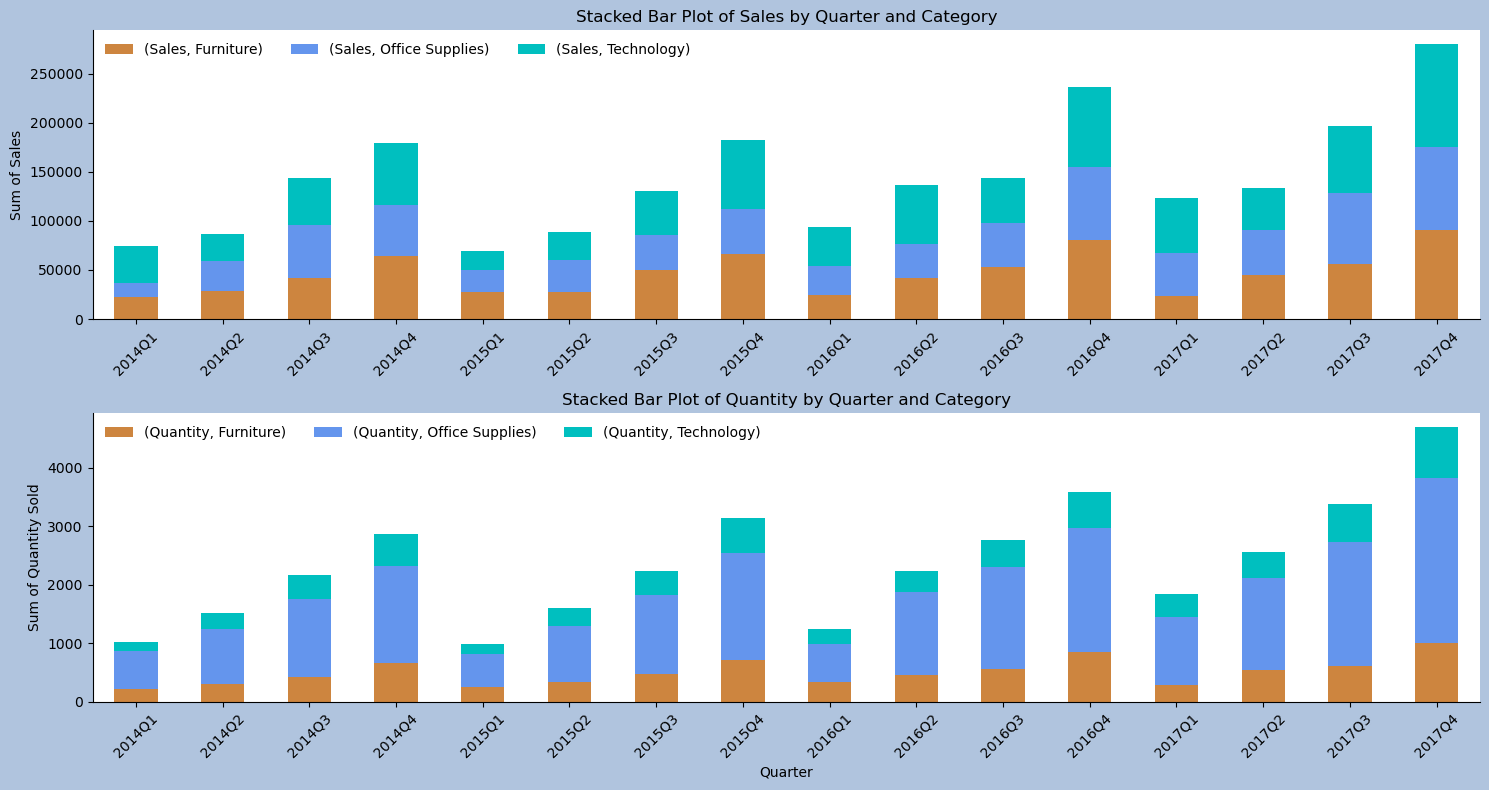

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
rect = fig.patch
fig.patch.set_facecolor('lightsteelblue')
colors = ["peru", "cornflowerblue","c"]
sns.set_palette(sns.color_palette(colors))

category_grp.unstack().plot.bar(stacked=True, ax=ax1)

ax1.set_xlabel('Quarter')
ax1.set_ylabel('Sum of Sales')
ax1.set_title('Stacked Bar Plot of Sales by Quarter and Category')
ax1.legend(frameon=False, loc="best", ncols=3)
ax1.set(xlabel=None)
ax1.tick_params(axis='x', labelrotation=45)

quant_grp.unstack().plot.bar(stacked=True,ax=ax2)
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Sum of Quantity Sold')
ax2.set_title('Stacked Bar Plot of Quantity by Quarter and Category')
ax2.legend(frameon=False, loc="best", ncols=3)
ax2.tick_params(axis='x', labelrotation=45)
sns.despine()
plt.tight_layout()
plt.show()

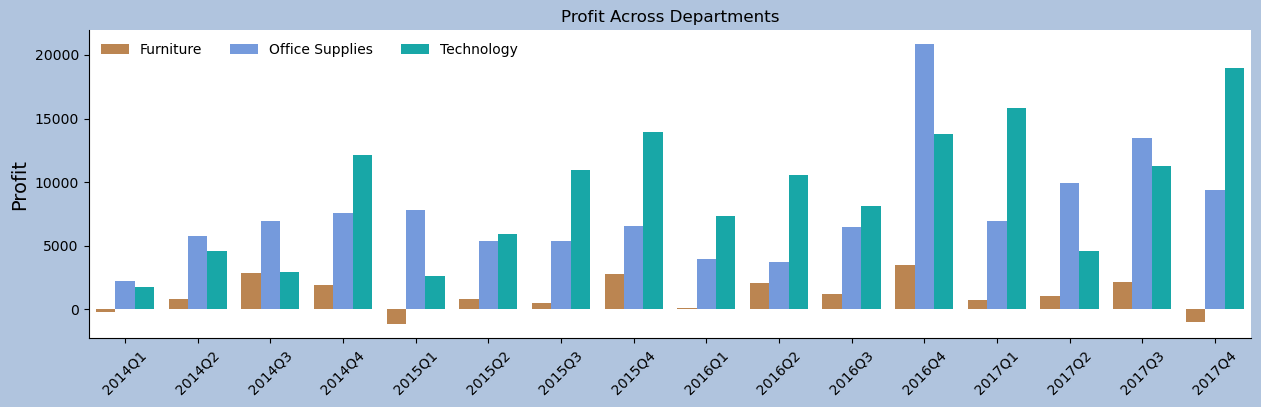

In [11]:

fig = plt.figure(figsize=(15, 4))
fig.patch.set_facecolor('lightsteelblue')
colors = ["peru", "cornflowerblue","c"]

sns.set_palette(sns.color_palette(colors))
ax=sns.barplot(x='Quarter', y='Profit', data=profit_grp,hue= 'Category')

plt.xlabel('Response', fontsize=14,color='black')
plt.ylabel('Profit', fontsize=14,color='black')
plt.title('Profit Across Departments', fontsize=12,color='black')
plt.legend(frameon=False, loc="best", ncols=3)
ax.set(xlabel=None)

ax.tick_params(axis='x', labelrotation=45)
sns.despine()
plt.show()

In [12]:
order_df['Country'].unique()

array(['United States'], dtype=object)

In [13]:
#https://simplemaps.com/data/us-cities.
cities = pd.read_excel('Copy of uscities.xlsx')
cities = cities[['state_name','state_id','city','lat','lng']]
cities.head()

state_name state_id         city      lat       lng
0    New York       NY     New York  40.6943  -73.9249
1  California       CA  Los Angeles  34.1141 -118.4068
2    Illinois       IL      Chicago  41.8375  -87.6866
3     Florida       FL        Miami  25.7840  -80.2101
4       Texas       TX      Houston  29.7860  -95.3885

In [14]:
cities[cities['city']== 'New York']

state_name state_id      city      lat      lng
0   New York       NY  New York  40.6943 -73.9249

In [15]:
cities['city'] = cities['city'].replace({'New York':'New York City'})
cities['city']

0         New York City
1           Los Angeles
2               Chicago
3                 Miami
4               Houston
              ...      
31115            Kohatk
31116         Ironville
31117           Newkirk
31118    Falcon Village
31119       Millerstown
Name: city, Length: 31120, dtype: object

In [16]:
sales_map = pd.merge(left=us_orders, right=cities, 
                     left_on=['State', 'City'], right_on=['state_name', 'city'], 
                     how ='left', indicator=True)
sales_map.sample(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6154    6155  CA-2017-151484 2017-04-20 2017-04-23     First Class   
437      438  CA-2016-147375 2016-06-12 2016-06-14    Second Class   
4584    4585  US-2017-163790 2017-11-02 2017-11-04    Second Class   
8700    8701  CA-2017-119284 2017-06-15 2017-06-20  Standard Class   
641      642  CA-2017-167913 2017-07-30 2017-08-03    Second Class   

     Customer ID      Customer Name      Segment        Country  \
6154    CV-12805      Cynthia Voltz    Corporate  United States   
437     PO-19180  Philisse Overcash  Home Office  United States   
4584    NL-18310     Nancy Lomonaco  Home Office  United States   
8700    TS-21205        Thomas Seio    Corporate  United States   
641     JL-15835           John Lee     Consumer  United States   

               City  ... Discount    Profit Quarter  Year    state_name  \
6154   Philadelphia  ...      0.2    5.7753  2017Q2  2017  Pennsylvania   
437         Chicago  ...      0.2  113.6394  2016Q2  2016      Illinois   
4584       Danville  ...      0.0   38.2900  2017Q4  2017    California   
8700      Nashville  ...      0.2    6.7032  2017Q2  2017     Tennessee   
641   Mission Viejo  ...      0.0   85.9040  2017Q3  2017    California   

     state_id           city      lat       lng  _merge  
6154       PA   Philadelphia  40.0077  -75.1339    both  
437        IL        Chicago  41.8375  -87.6866    both  
4584       CA       Danville  37.8121 -121.9698    both  
8700       TN      Nashville  36.1715  -86.7842    both  
641        CA  Mission Viejo  33.6096 -117.6551    both  

[5 rows x 29 columns]

In [17]:
sales_map = sales_map.drop(columns=['state_name','city','_merge'])
sales_map.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit Quarter  Year  state_id      lat       lng  
0     0.00   41.9136  2016Q4  2016        KY  37.8397  -87.5798  
1     0.00  219.5820  2016Q4  2016        KY  37.8397  -87.5798  
2     0.00    6.8714  2016Q2  2016        CA  34.1141 -118.4068  
3     0.45 -383.0310  2015Q4  2015        FL  26.1412  -80.1464  
4     0.20    2.5164  2015Q4  2015        FL  26.1412  -80.1464  

[5 rows x 26 columns]

In [18]:
sales_map = sales_map.dropna()
sales_map.shape

(9824, 26)

In [19]:
world = geopandas.read_file('ne_50m_admin_0_countries.zip')
world.head(2)

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          3   Zimbabwe    ZWE         0      2   
1  Admin-0 country          1          3     Zambia    ZMB         0      2   

                TYPE TLC     ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1  Zimbabwe  ...      None       None      None   
1  Sovereign country   1    Zambia  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      None       None      None      None       None      None   
1      None       None      None      None       None      None   

                                            geometry  
0  POLYGON ((31.28789 -22.40205, 31.19727 -22.344...  
1  POLYGON ((30.39609 -15.64307, 30.25068 -15.643...  

[2 rows x 169 columns]

In [20]:
us_map=world[world['ADMIN']=='United States of America']
us_map

featurecla  scalerank  LABELRANK                SOVEREIGNT SOV_A3  \
16  Admin-0 country          5          2  United States of America    US1   

    ADM0_DIF  LEVEL     TYPE TLC                     ADMIN  ... FCLASS_TR  \
16         1      2  Country   1  United States of America  ...      None   

    FCLASS_ID FCLASS_PL FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD  \
16       None      None      None       None      None      None       None   

   FCLASS_UA                                           geometry  
16      None  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...  

[1 rows x 169 columns]

In [21]:
us_map['ADMIN'] = us_map['ADMIN'].replace({'United States of America':'United States'})
us_map['ADMIN']

16    United States
Name: ADMIN, dtype: object

In [22]:
us_map1= us_map[['ADMIN','geometry']]
us_map1                 

ADMIN                                           geometry
16  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...

In [23]:
geo_sales = pd.merge(left=sales_map, right=us_map1, 
                     left_on=['Country'], right_on=['ADMIN'], 
                     how='left', indicator=True)
geo_sales.sample(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8679    8824  CA-2017-100622 2017-11-03 2017-11-07  Standard Class   
3669    3732  CA-2015-109575 2015-09-18 2015-09-23  Standard Class   
9502    9664  CA-2017-132619 2017-08-31 2017-09-05  Standard Class   
9217    9379  CA-2016-117625 2016-05-10 2016-05-15  Standard Class   
9673    9843  US-2016-125402 2016-09-25 2016-10-01  Standard Class   

     Customer ID     Customer Name    Segment        Country           City  \
8679    DK-13090         Dave Kipp   Consumer  United States        Orlando   
3669    KH-16630        Ken Heidel  Corporate  United States        Clinton   
9502    MS-17770  Maxwell Schwartz   Consumer  United States  San Francisco   
9217    GM-14500      Gene McClure   Consumer  United States        Chicago   
9673    DL-12865        Dan Lawera   Consumer  United States     Long Beach   

      ... Discount    Profit Quarter  Year state_id      lat       lng  \
8679  ...      0.2    3.7408  2017Q4  2017       FL  28.4773  -81.3370   
3669  ...      0.0  129.9974  2015Q3  2015       MD  38.7499  -76.9063   
9502  ...      0.0    9.6975  2017Q3  2017       CA  37.7558 -122.4449   
9217  ...      0.2    2.3868  2016Q2  2016       IL  41.8375  -87.6866   
9673  ...      0.2   60.3920  2016Q3  2016       CA  33.7977 -118.1670   

              ADMIN                                           geometry  _merge  
8679  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...    both  
3669  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...    both  
9502  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...    both  
9217  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...    both  
9673  United States  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...    both  

[5 rows x 29 columns]

In [24]:
geo_sales['_merge'].value_counts()

both          9824
left_only        0
right_only       0
Name: _merge, dtype: int64

In [25]:
geo_sales = geo_sales.drop(columns=['_merge','ADMIN'])
geo_sales.head(1)

Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ...   Sales  Quantity  \
0   Claire Gute  Consumer  United States  Henderson  ...  261.96         2   

  Discount   Profit Quarter  Year state_id      lat      lng  \
0      0.0  41.9136  2016Q4  2016       KY  37.8397 -87.5798   

                                            geometry  
0  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...  

[1 rows x 27 columns]

In [26]:
geo_sales.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Quarter           period[Q-DEC]
Year                      int64
state_id                 object
lat                     float64
lng                     float64
geometry               geometry
dtype: object

In [27]:
geo_sales['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [28]:
conditions = [
    geo_sales['Region'] == 'South',
    geo_sales['Region'] == 'West',
    geo_sales['Region'] == 'Central',
    geo_sales['Region'] == 'East'
]

colors = ['pink', 'blue', 'yellow', 'green']

geo_sales['color'] = np.select(conditions, colors, default='unknown')

geo_sales.sample(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1350    1376  CA-2014-126361 2014-08-04 2014-08-09    Second Class   
1167    1192  CA-2017-117212 2017-02-26 2017-02-28    Second Class   
4155    4224  CA-2017-134565 2017-06-11 2017-06-13    Second Class   
7276    7389  CA-2016-105732 2016-09-13 2016-09-18  Standard Class   
6713    6814  CA-2017-156237 2017-09-14 2017-09-15     First Class   

     Customer ID      Customer Name      Segment        Country  \
1350    VD-21670  Valerie Dominguez     Consumer  United States   
1167    BT-11530    Bradley Talbott  Home Office  United States   
4155    TB-21400   Tom Boeckenhauer     Consumer  United States   
7276    AG-10270    Alejandro Grove     Consumer  United States   
6713    PS-18760       Pamela Stobb     Consumer  United States   

                City  ... Quantity  Discount    Profit Quarter  Year state_id  \
1350  Pleasant Grove  ...        3       0.0  305.1300  2014Q3  2014       UT   
1167     Los Angeles  ...        4       0.0  109.7208  2017Q1  2017       CA   
4155         Seattle  ...        3       0.0   41.8608  2017Q2  2017       WA   
7276           Omaha  ...        3       0.0    0.2997  2016Q3  2016       NE   
6713    Philadelphia  ...        8       0.2    4.7976  2017Q3  2017       PA   

          lat       lng                                           geometry  \
1350  40.3716 -111.7412  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...   
1167  34.1141 -118.4068  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...   
4155  47.6211 -122.3244  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...   
7276  41.2627  -96.0529  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...   
6713  40.0077  -75.1339  MULTIPOLYGON (((-132.74687 56.52568, -132.7576...   

       color  
1350    blue  
1167    blue  
4155    blue  
7276  yellow  
6713   green  

[5 rows x 28 columns]

us_map = folium.Map(location=[38, -97], zoom_start=4)

for _, city in geo_sales.iterrows():
    folium.Marker(
        location=[city['lat'], city['lng']],
        popup=folium.Popup(city['City'], parse_html=True),
        tooltip=city['City'],
        icon=folium.Icon(color=city['color'], prefix='fa', icon='circle')
    ).add_to(us_map)
us_map

In [29]:
geo_sales['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'Connecticut', 'District of Columbia', 'Kansas', 'Vermont',
       'Maine', 'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [30]:
#st_profit17=sales_map[(sales_map['Quarter']=='2014')]
st_profit= sales_map.groupby(['Quarter','State','state_id'])[['Profit']].sum()
st_profit.reset_index(inplace=True)
st_profit.tail(10)

Quarter           State state_id     Profit
583  2017Q4  South Carolina       SC   212.4172
584  2017Q4    South Dakota       SD     6.6300
585  2017Q4       Tennessee       TN -2538.0464
586  2017Q4           Texas       TX -4633.2249
587  2017Q4            Utah       UT    13.5360
588  2017Q4         Vermont       VT    67.6599
589  2017Q4        Virginia       VA   649.8309
590  2017Q4      Washington       WA  2172.4247
591  2017Q4   West Virginia       WV   -76.9536
592  2017Q4       Wisconsin       WI   617.1914

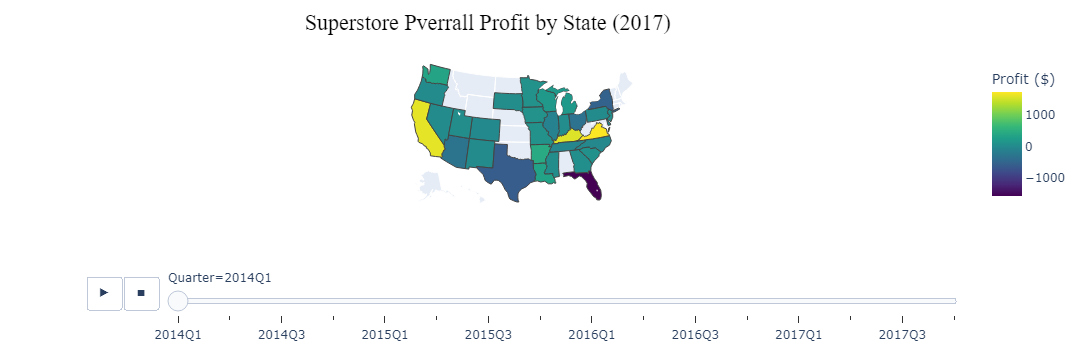

In [31]:
fig = px.choropleth(
    st_profit,
    locations='state_id', 
    locationmode="USA-states", 
    scope="usa",
    color='Profit',
    color_continuous_scale="Viridis",
    labels={'Profit':'Profit ($)'},
    animation_frame='Quarter'
)
fig.update_layout(
      title_text = 'Superstore Pverrall Profit by State (2017)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45
         )

fig.show()

## Since Texas performed poorly from 2014 -2017, we are going to analyze the sales of Texas.

In [32]:
tex_sales = sales_map[sales_map['State']=='Texas']
tex_sales=tex_sales.dropna()
tex_sales.sample(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
5201    5202  CA-2016-103982 2016-03-03 2016-03-08  Standard Class   
896      897  CA-2016-140634 2016-10-03 2016-10-06    Second Class   
9791    9792  CA-2014-127166 2014-05-21 2014-05-23    Second Class   
3016    3017  US-2016-160528 2016-08-23 2016-08-30  Standard Class   
5100    5101  CA-2014-158442 2014-03-17 2014-03-17        Same Day   

     Customer ID     Customer Name      Segment        Country        City  \
5201    AA-10315        Alex Avila     Consumer  United States  Round Rock   
896     HL-15040      Hunter Lopez     Consumer  United States     Houston   
9791    KH-16360  Katherine Hughes     Consumer  United States     Houston   
3016    MH-18115    Mick Hernandez  Home Office  United States       Pharr   
5100    AZ-10750      Annie Zypern     Consumer  United States      Dallas   

      ...                                       Product Name    Sales  \
5201  ...  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   41.720   
896   ...                                    Staple envelope   15.648   
9791  ...                                    Staple envelope   56.064   
3016  ...                      SAFCO Boltless Steel Shelving  727.296   
5100  ...                                         Newell 333    4.448   

     Quantity Discount    Profit Quarter  Year  state_id      lat      lng  
5201        7      0.2    5.7365  2016Q1  2016        TX  30.5270 -97.6642  
896         2      0.2    5.0856  2016Q4  2016        TX  29.7860 -95.3885  
9791        6      0.2   21.0240  2014Q2  2014        TX  29.7860 -95.3885  
3016        8      0.2 -172.7328  2016Q3  2016        TX  26.1685 -98.1904  
5100        2      0.2    0.3336  2014Q1  2014        TX  32.7935 -96.7667  

[5 rows x 26 columns]

In [33]:
tex_17=tex_sales[tex_sales['Year'] ==2017 ]
tex_group= tex_17.groupby(['City'])[['Profit']].sum()
tex_group.reset_index(inplace=True)
tex_group=tex_group.sort_values('Profit')
tex_group.head()

City     Profit
21     Houston -3853.7396
13      Dallas -2224.4558
38        Waco  -522.5002
34  Round Rock  -436.3292
22  Huntsville  -423.2951

In [34]:
tex_16=tex_sales[tex_sales['Year'] == 2016 ]
tex_group2 = tex_16.groupby(['City'])[['Profit']].sum()
tex_group2.reset_index(inplace=True)
tex_group2 = tex_group2.sort_values('Profit')
tex_group2.head()

City     Profit
14     Houston -3343.9764
25  Round Rock  -747.1021
20    Pasadena  -368.2424
21       Pharr  -216.2264
15  Huntsville  -210.5824

In [35]:
tex_15=tex_sales[tex_sales['Year'] == 2015 ]
tex_group3= tex_15.groupby(['City'])[['Profit']].sum()
tex_group3.reset_index(inplace=True)
tex_group3=tex_group3.sort_values('Profit')
tex_group3.head()

City     Profit
18  San Antonio -1174.9841
8        Dallas  -621.4942
6    Carrollton  -563.2456
1      Amarillo  -276.8927
15   Huntsville  -140.5778

In [36]:
tex_14=tex_sales[tex_sales['Year'] == 2014 ]
tex_group4= tex_14.groupby(['City'])[['Profit']].sum()
tex_group4.reset_index(inplace=True)
tex_group4=tex_group4.sort_values('Profit',ascending= False)
tex_group4.head(5)

City    Profit
9    Fort Worth  537.2534
1        Austin  265.4232
3   Brownsville  216.8796
15       Laredo   74.1688
2      Beaumont   58.1588

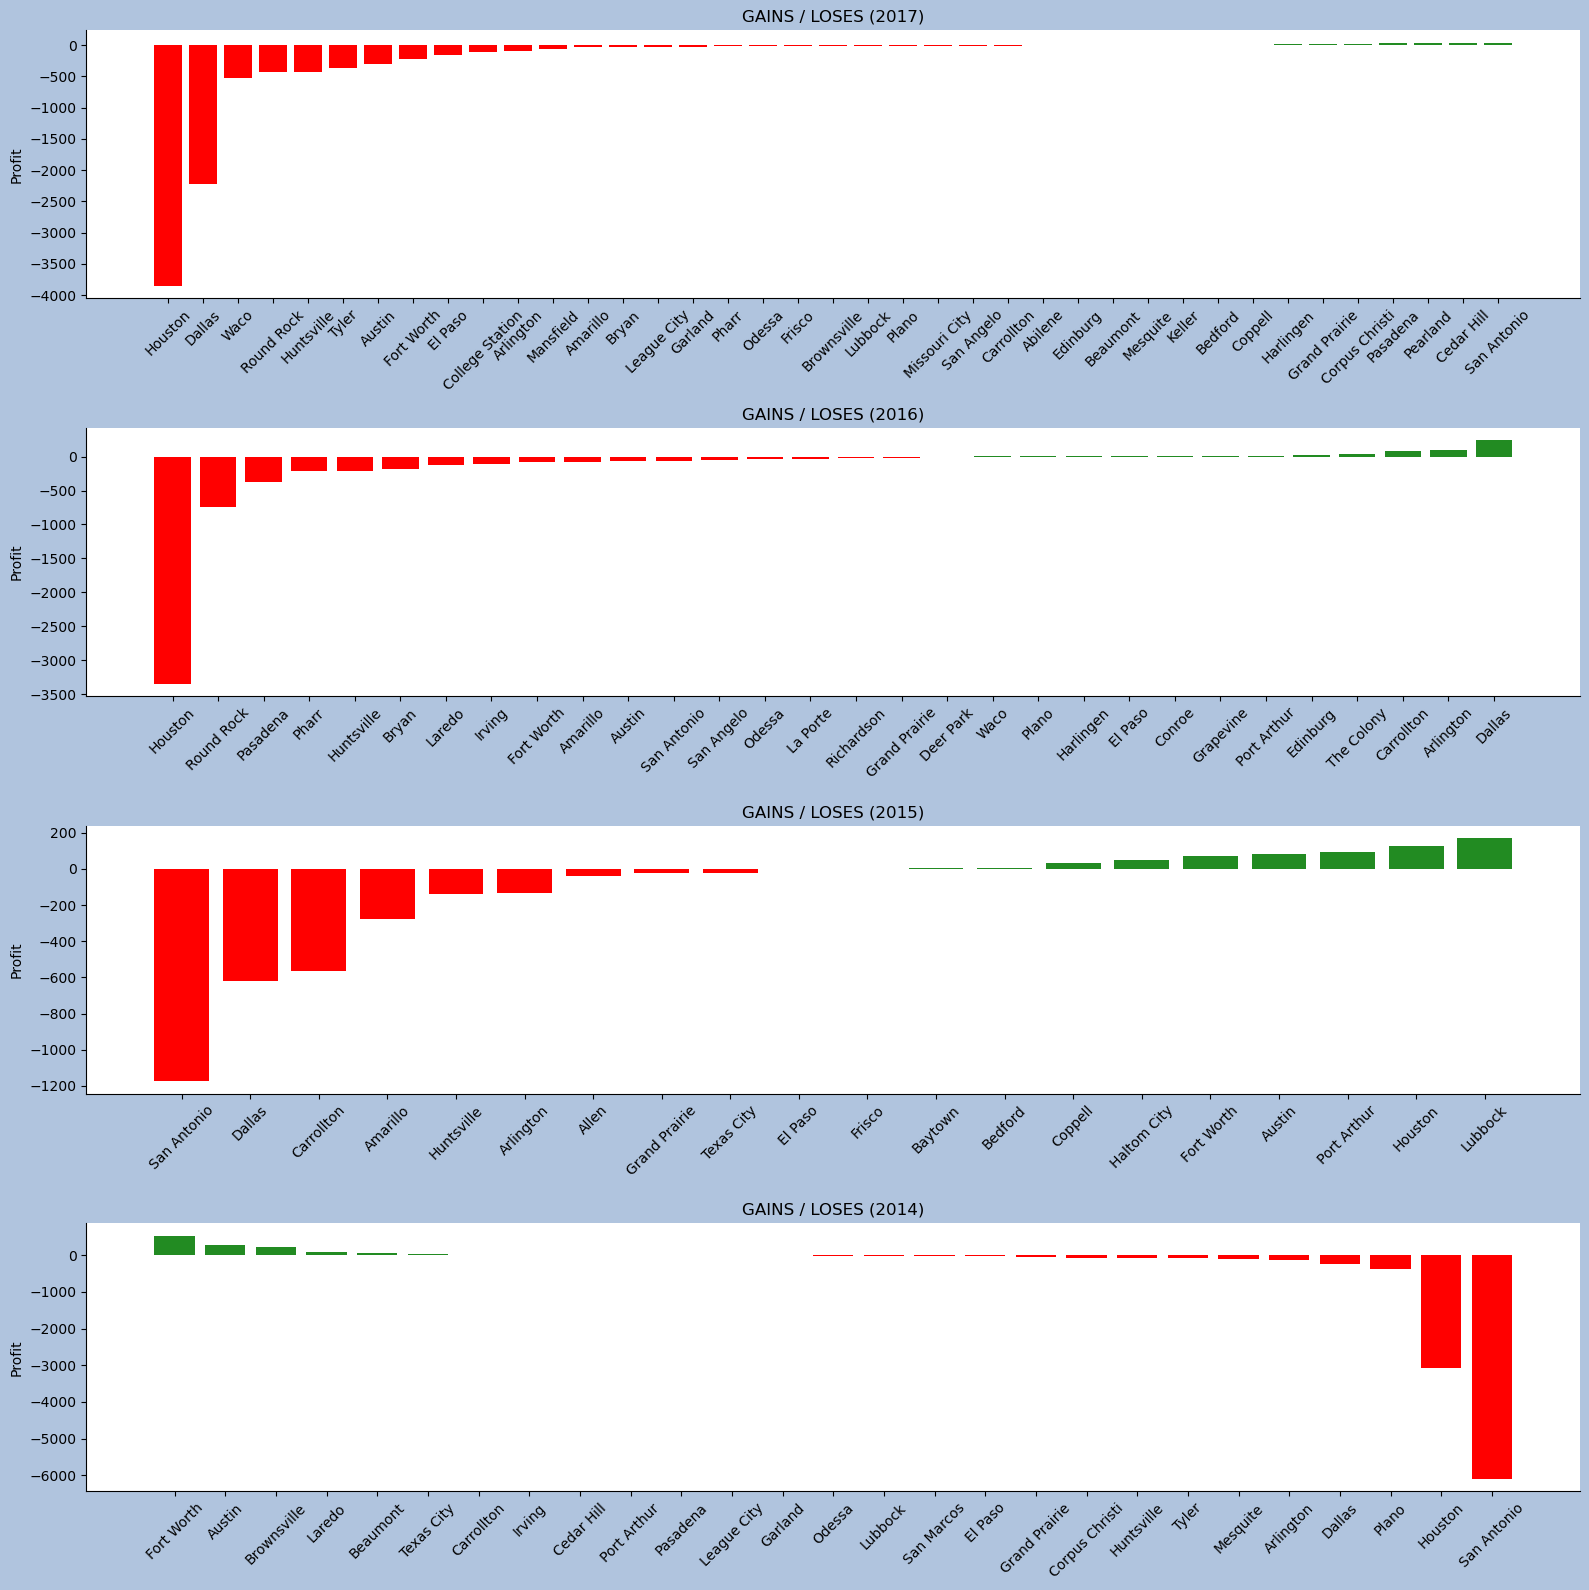

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(16, 16))  

fig.patch.set_facecolor('lightsteelblue')

def plot_bars(ax, data, title):
    colors = ['forestgreen' if val >= 0 else 'red' for val in data['Profit']]
    ax.bar(data['City'], data['Profit'], color=colors)
    sns.despine(ax=ax)
    #ax.set_xlabel('City')
    ax.set_ylabel('Profit')
    ax.set_title(title)
    ax.tick_params(axis='x', labelrotation=45)

plot_bars(ax1, tex_group, 'GAINS / LOSES (2017)')
plot_bars(ax2, tex_group2, 'GAINS / LOSES (2016)')
plot_bars(ax3, tex_group3, 'GAINS / LOSES (2015)')
plot_bars(ax4, tex_group4, 'GAINS / LOSES (2014)')

plt.tight_layout()

# Show the plot
plt.show()

In [38]:
new_tex= tex_sales.groupby(['Year','City'])[['Profit']].sum()
new_tex

Profit
Year City                 
2014 Arlington   -120.3849
     Austin       265.4232
     Beaumont      58.1588
     Brownsville  216.8796
     Carrollton    18.6866
...                    ...
2017 Round Rock  -436.3292
     San Angelo    -8.7232
     San Antonio   40.9393
     Tyler       -364.3734
     Waco        -522.5002

[116 rows x 1 columns]

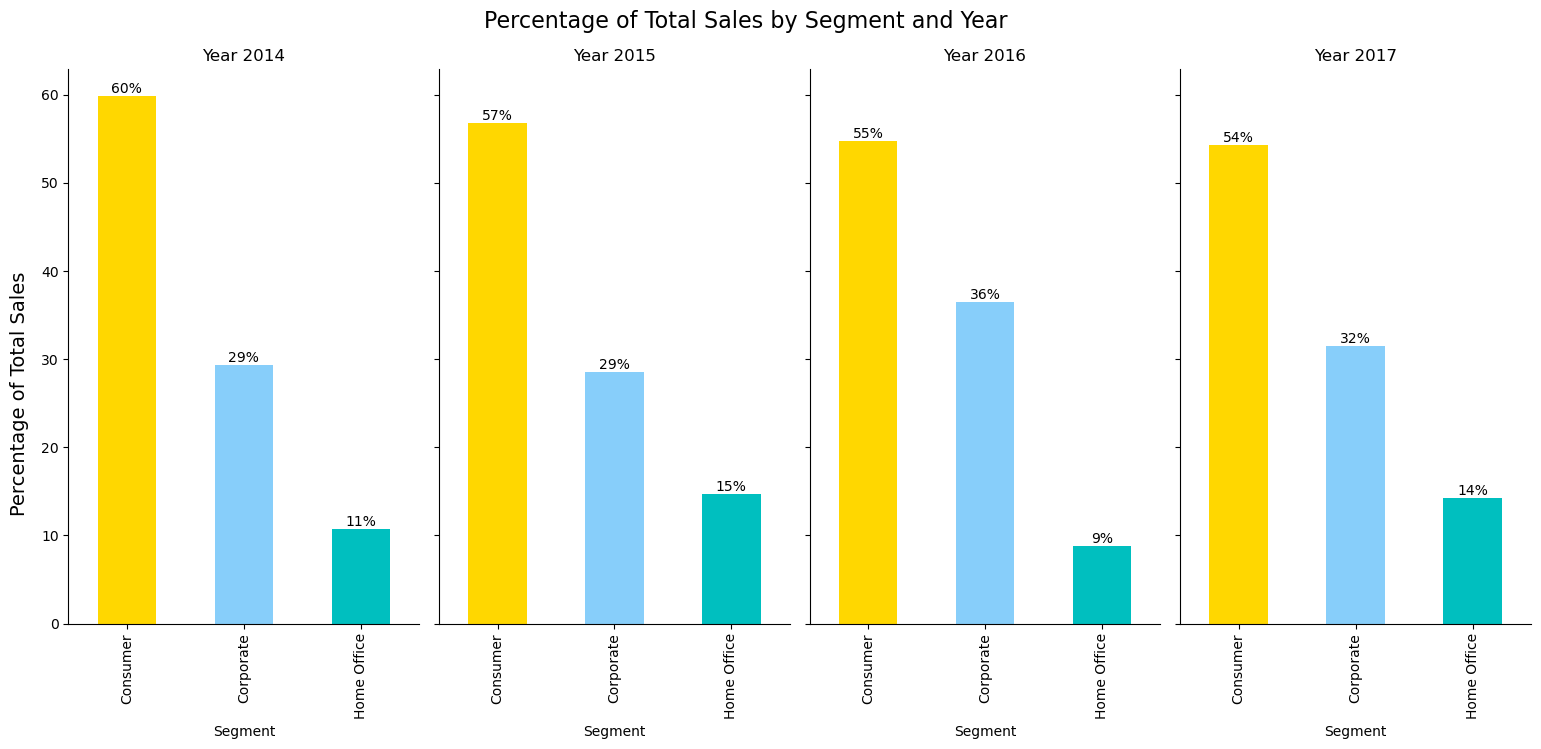

In [39]:
seg_tex_sum = tex_sales.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

total_sales_per_year = tex_sales.groupby('Year')['Sales'].sum().reset_index()
total_sales_per_year = total_sales_per_year.rename(columns={'Sales': 'Total_Sales'})

seg_tex = pd.merge(seg_tex_sum, total_sales_per_year, on='Year')

seg_tex['Percentage'] = (seg_tex['Sales'] / seg_tex['Total_Sales']) * 100

seg_tex['Percentage'] = seg_tex['Percentage'].round(2)

fig, axes = plt.subplots(1, 4, figsize=(16, 8), sharey=True) 

colors = ["gold", "lightskyblue","c"]

seg_tex1 = seg_tex.pivot(index='Segment', columns='Year', values='Percentage') 

axes = axes.flatten()
for i, year in enumerate(seg_tex1.columns):
    seg_tex1[year].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Segment')
    axes[i].set_ylim(0,)
    #axes[i].set_ylabel('Percentage of Total Sales')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.0f%%', label_type='edge')

fig.text(0.04, 0.5, 'Percentage of Total Sales', va='center', rotation='vertical', fontsize=14)
sns.despine()

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.suptitle('Percentage of Total Sales by Segment and Year', fontsize=16)

plt.show()

In [40]:
sub_tex = tex_sales.groupby(['Year', 'Sub-Category'])[['Sales']].sum().reset_index()
sub_tex = sub_tex.sort_values(['Year','Sales'],ascending = False)
sub_tex = sub_tex.rename(columns ={'Sales':'Total Sales'})
sub_tex = sub_tex.dropna()
sub_tex.head()

Year Sub-Category  Total Sales
63  2017       Phones    6951.6800
66  2017       Tables    6135.6470
64  2017      Storage    5035.1680
55  2017       Chairs    4782.9040
54  2017    Bookcases    3717.1112

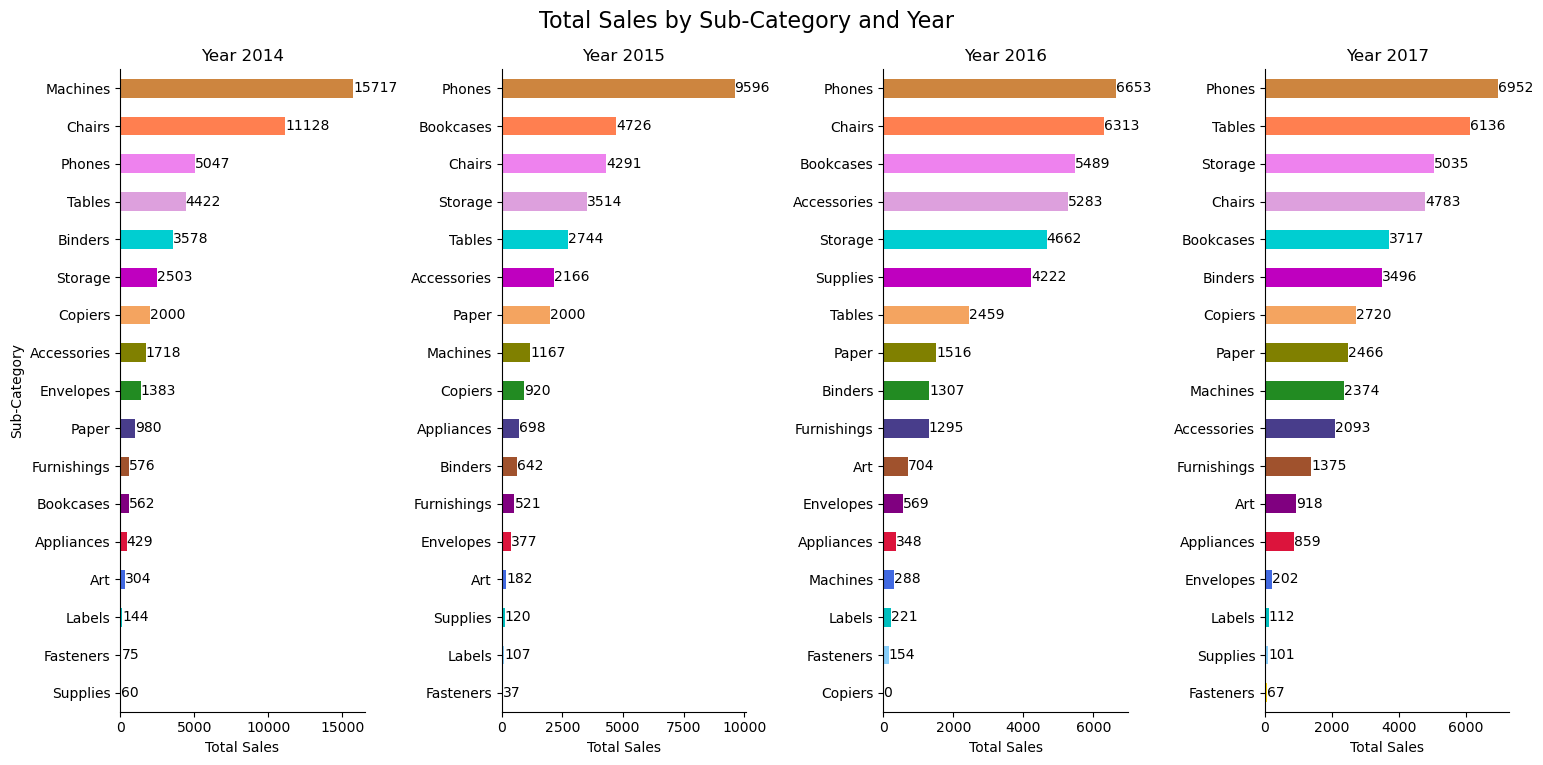

In [45]:
sub_tex = tex_sales.groupby(['Year', 'Sub-Category'])[['Sales']].sum().reset_index()
sub_tex = sub_tex.rename(columns={'Sales': 'Total Sales'})

sub_tex_pivot= sub_tex.pivot(index='Sub-Category', columns='Year', values='Total Sales')
sub_tex_pivot[2016] = sub_tex_pivot[2016].fillna(0)
fig, axes = plt.subplots(1, 4, figsize=(16, 8), sharey=False) 
colors = ["gold", "lightskyblue", "c", 'royalblue', 'crimson', 'purple', 'sienna','darkslateblue', 'forestgreen', 'olive', 
          'sandybrown', 'm', 'darkturquoise', 'plum','violet','coral','peru',]

axes = axes.flatten()

for i, year in enumerate(sub_tex_pivot.columns):
    data_sorted = sub_tex_pivot[year].sort_values(ascending=True)
    data_sorted.plot(kind='barh', ax=axes[i], color=colors[:len(data_sorted)])
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Total Sales')
    if i == 0:
        axes[i].set_ylabel('Sub-Category')
    else:
        axes[i].set_ylabel('')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.0f', label_type='edge')
sns.despine()

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.suptitle('Total Sales by Sub-Category and Year', fontsize=16)

plt.show()

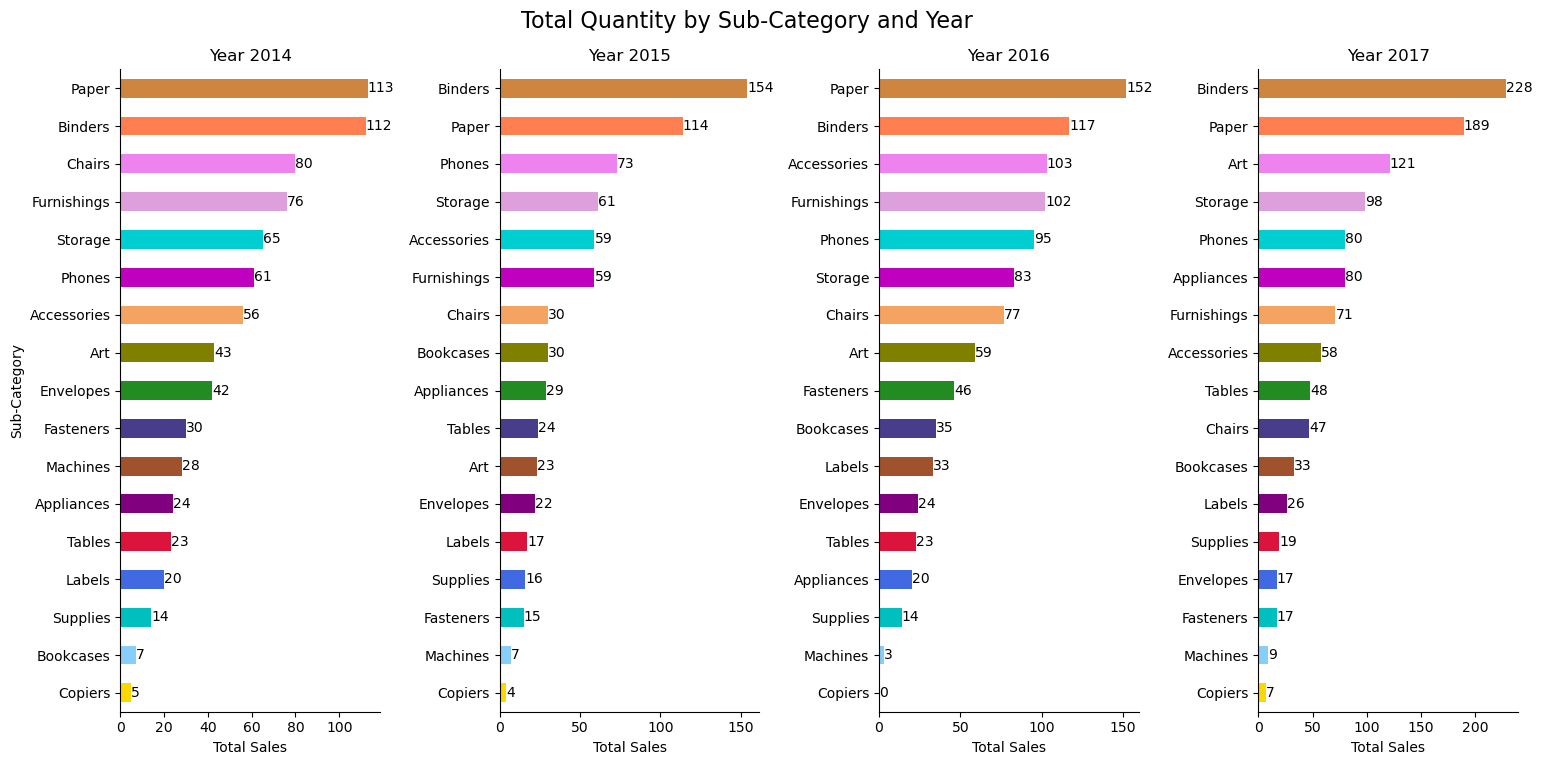

In [42]:
quant_tex = tex_sales.groupby(['Year', 'Sub-Category'])[['Quantity']].sum().reset_index()
quant_tex = quant_tex.rename(columns={'Quantity': 'Total Quantity'})

quant_tex_pivot= quant_tex.pivot(index='Sub-Category', columns='Year', values='Total Quantity')
quant_tex_pivot[2016] = quant_tex_pivot[2016].fillna(0)
fig, axes = plt.subplots(1, 4, figsize=(16, 8), sharey=False) 
colors = ["gold", "lightskyblue", "c", 'royalblue', 'crimson', 'purple', 'sienna','darkslateblue', 'forestgreen', 'olive', 
          'sandybrown', 'm', 'darkturquoise', 'plum','violet','coral','peru']

axes = axes.flatten()

for i, year in enumerate(quant_tex_pivot.columns):
    data_sorted = quant_tex_pivot[year].sort_values(ascending=True)
    data_sorted.plot(kind='barh', ax=axes[i], color=colors[:len(data_sorted)])
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Total Sales')
    if i == 0:
        axes[i].set_ylabel('Sub-Category')
    else:
        axes[i].set_ylabel('')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.0f', label_type='edge')
sns.despine()

plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.suptitle('Total Quantity by Sub-Category and Year', fontsize=16)

plt.show()

In [43]:
colormap = {
    'Accessories': "gold", 'Appliances': "lightskyblue", 'Art': "c",
    'Binders': 'royalblue', 'Bookcases': 'crimson', 'Chairs': 'purple',
    'Copiers': 'sienna', 'Envelopes': 'darkslateblue', 'Fasteners': 'forestgreen',
    'Furnishings': 'olive', 'Labels': 'sandybrown', 'Machines': 'm',
    'Paper': 'darkturquoise', 'Phones': 'plum', 'Storage': 'darkorange',
    'Supplies': 'black', 'Tables': 'peru'
}

chart = alt.Chart(sub_tex).mark_line(point=alt.OverlayMarkDef(size=100)).encode(
    x=alt.X("Year:O", title="Year"),
    y=alt.Y("rank:O", title="Rank"),
    color=alt.Color('Sub-Category', scale=alt.Scale(
        domain=list(colormap.keys()),
        range=list(colormap.values())))
).transform_window(
    rank="rank()",
    sort=[alt.SortField("Total Sales", order="descending")],
    groupby=["Year"]
).properties(
    title="Bump Chart for Total Sales in Texas",
    width=950,
    height=200,
)

chart


alt.Chart(...)